<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_deepLearningWithImage/week2/week2_hw2_%EC%9D%B4%EB%AF%B8%EC%A7%80%EA%B0%80%EB%A1%9C%EB%A1%9C3%EA%B0%9C%EB%82%98%EB%88%84%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

img


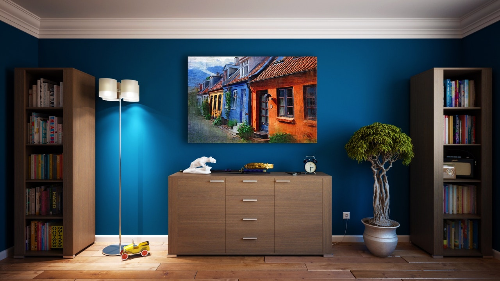

output


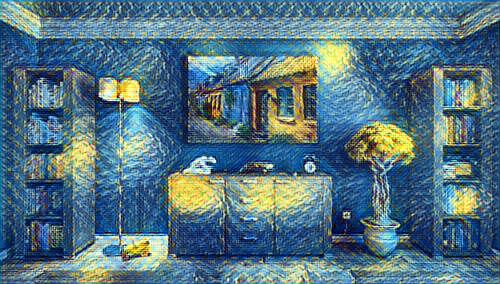

output2


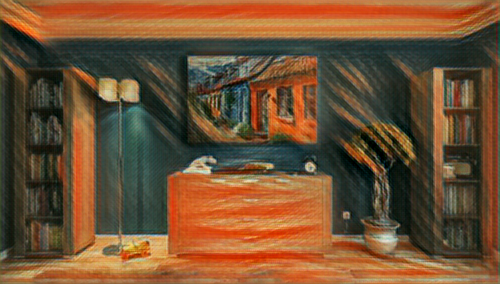

output3


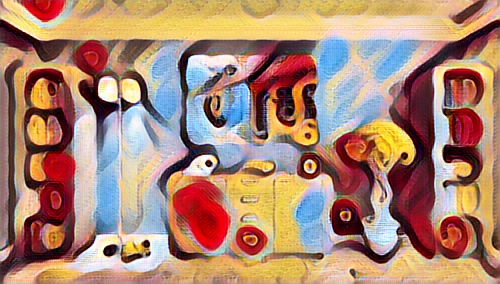

output4


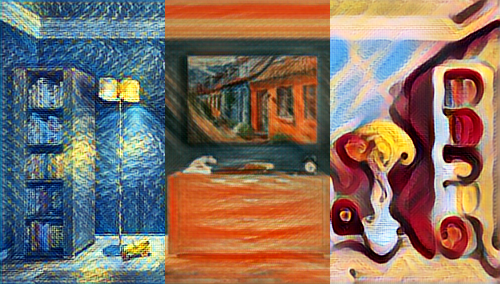

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

net = cv2.dnn.readNetFromTorch('models/instance_norm/starry_night.t7')
net2 = cv2.dnn.readNetFromTorch('models/instance_norm/the_scream.t7')
net3 = cv2.dnn.readNetFromTorch('models/instance_norm/candy.t7')

img = cv2.imread('imgs/hw.jpg')

h, w, c = img.shape

img = cv2.resize(img, dsize=(500, int(h / w * 500)))

MEAN_VALUE = [103.939, 116.779, 123.680]
blob = cv2.dnn.blobFromImage(img, mean=MEAN_VALUE)

##net1
net.setInput(blob)
output = net.forward()

output = output.squeeze().transpose((1, 2, 0))

output += MEAN_VALUE
output = np.clip(output, 0, 255)
output = output.astype('uint8')


##net2
net2.setInput(blob)
output2 = net2.forward()

output2 = output2.squeeze().transpose((1, 2, 0))

output2 += MEAN_VALUE
output2 = np.clip(output2, 0, 255)
output2 = output2.astype('uint8')


##net3
net3.setInput(blob)
output3 = net3.forward()

output3 = output3.squeeze().transpose((1, 2, 0))

output3 += MEAN_VALUE
output3 = np.clip(output3, 0, 255)
output3 = output3.astype('uint8')



print('img')
cv2_imshow(img)
print('output')
cv2_imshow(output)
print('output2')
cv2_imshow(output2)
print('output3')
cv2_imshow(output3)

output = output[:,0:165]
output2 = output2[:,165:330]
output3 = output3[:,330:]
output4 = np.concatenate([output,output2,output3], axis=1)


print('output4')
cv2_imshow(output4)